0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


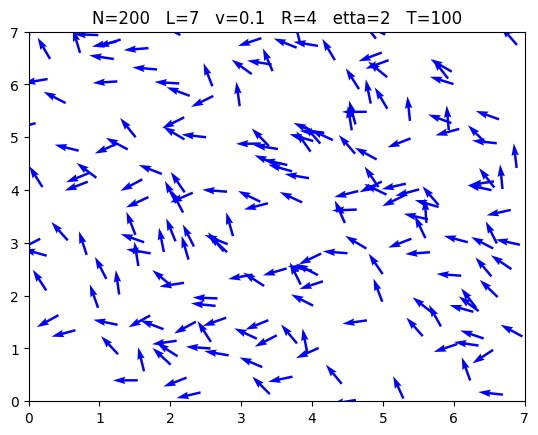

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 17 12:47:58 2025

@author: Pacific
"""

import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# =============================================================================
# simulation
# =============================================================================
time_step = 1
def initialize() :
    global N, L, x_positions, y_positions, directions, order_parameters
    x_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    y_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    directions = [ [rd.uniform(0, 2*np.pi) for _ in range(N)] ]
    #order parameter
    v_xs = np.cos(directions[0])
    v_ys = np.sin(directions[0])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters = [order_parameter]

def update() :
    global R, v, etta
    xs = x_positions[-1]
    ys = y_positions[-1]
    v_xs = v*np.cos(directions[-1])
    v_ys = v*np.sin(directions[-1])
    #positions update
    new_xs = [ (xs[n] + time_step*v_xs[n])%L for n in range(N) ]
    new_ys = [ (ys[n] + time_step*v_ys[n])%L for n in range(N) ]
    x_positions.append(new_xs)
    y_positions.append(new_ys)
    #direction update
    new_dirs = []
    for n in range(N) :
        n_neighbors_dir = []
        for j in range(N) :
            dx = min( xs[n]-xs[j], 1-(xs[n]-xs[j]) )
            dy = min( ys[n]-ys[j], 1-(ys[n]-ys[j]) )
            if (dx**2 + dy**2)**0.5 < R :
                n_neighbors_dir.append(directions[-1][j])
        new_dir = np.mean(n_neighbors_dir) + rd.uniform(-etta/2, etta/2)
        new_dirs.append(new_dir)
    directions.append(new_dirs)
    #order parameter
    v_xs = np.cos(directions[-1])
    v_ys = np.sin(directions[-1])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters.append(order_parameter)

# =============================================================================
# running
# =============================================================================
N = 200
L = 7
v = 0.1
R = 4
etta = 2
T = 100
initialize()
for t in range(T) :
    update()
    print(t)

# =============================================================================
# animation
# =============================================================================
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
quiver = ax.quiver(x_positions[0], y_positions[0],
    np.cos(directions[0]), np.sin(directions[0]),
    color='blue', scale=20, width=0.005)

def update(frame):
    quiver.set_offsets(np.column_stack((x_positions[frame], y_positions[frame])))
    quiver.set_UVC(np.cos(directions[frame]), np.sin(directions[frame]))
    return quiver,

ani = FuncAnimation(fig, update, frames=T, interval=300, blit=True)
ax.set_title(f"N={N}   L={L}   v={v}   R={R}   etta={etta}   T={T}")
ani.save("animation_Vicsek.mp4")